In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# History

In [2]:
def plot_columns(df, columns, ylim=None, logaxis=False):
    # Check if 'Iteration' is a column in the DataFrame
    if 'Iteration' not in df.columns:
        raise ValueError("The DataFrame does not contain an 'Iteration' column.")
    
    # Check if all columns in the list are present in the DataFrame
    for column in columns:
        if column not in df.columns:
            raise ValueError(f"The DataFrame does not contain the column: {column}")
    
    # Plotting each specified column against the 'Iteration' column
    plt.figure(figsize=(20, 6))
    for column in columns:
        plt.plot(df['Iteration'], df[column], label=column)

    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Setting the y-axis to a logarithmic scale if specified
    if logaxis:
        plt.yscale('log')

    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title('Plot of Columns over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
history = 'history/training_history.csv'
history = pd.read_csv(history)

history.head()

,Elapsed Time,Iteration,Total Iterations,D/latent_real,D/latent_fake,D/latent_reg,D/ref_real,D/ref_fake,D/ref_reg,G/latent_adv,G/latent_cyc,G/latent_id,G/latent_sty,G/latent_ds,G/ref_adv,G/ref_cyc,G/ref_id,G/ref_sty,G/ref_ds,G/lambda_ds
0,0:01:04,100,100000,0.309995,0.040205,0.007289,0.079667,0.047144,0.006866,1.088008,0.258288,0.236334,1.237164,0.601262,1.080370,0.241585,0.194932,3.220682,0.000322,0.999
1,0:01:40,200,100000,0.033995,0.034393,0.011108,0.021037,0.011913,0.005891,1.522957,0.112032,0.104352,0.850012,0.582050,0.998529,0.122546,0.077351,1.094425,0.000135,0.998
2,0:02:15,300,100000,0.028327,0.034124,0.021871,0.009301,0.035818,0.008410,0.933746,0.099271,0.092424,0.633806,0.520463,0.880578,0.064048,0.057696,0.512057,0.000123,0.997
3,0:02:50,400,100000,0.741286,0.017347,0.107845,0.217692,0.087091,0.005761,0.579092,0.051314,0.052582,0.556958,0.462341,0.488609,0.053430,0.045492,0.565916,0.000050,0.996
4,0:03:25,500,100000,0.036331,0.003918,0.054793,0.000066,0.021880,0.016199,1.028160,0.063515,0.062874,0.561726,0.468895,0.828499,0.048681,0.047771,0.821623,0.000081,0.995


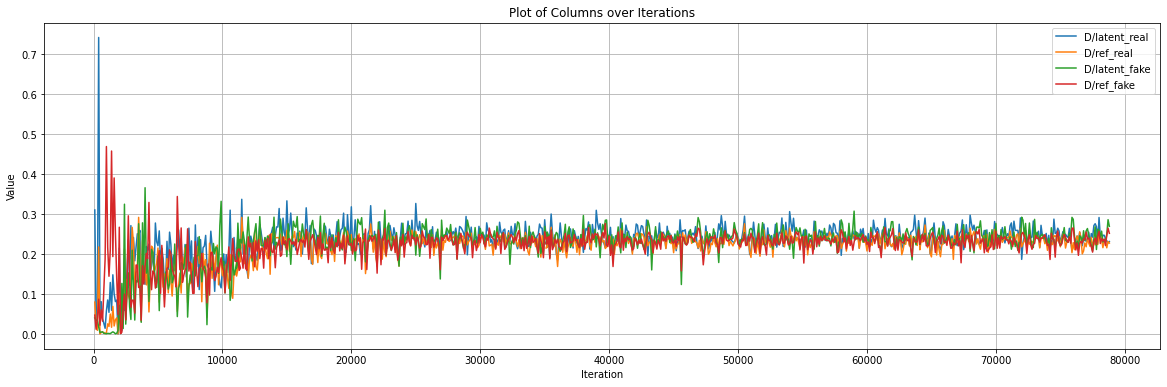

In [4]:
plot_columns(history, ['D/latent_real', 'D/ref_real', 'D/latent_fake', 'D/ref_fake'], logaxis=False)

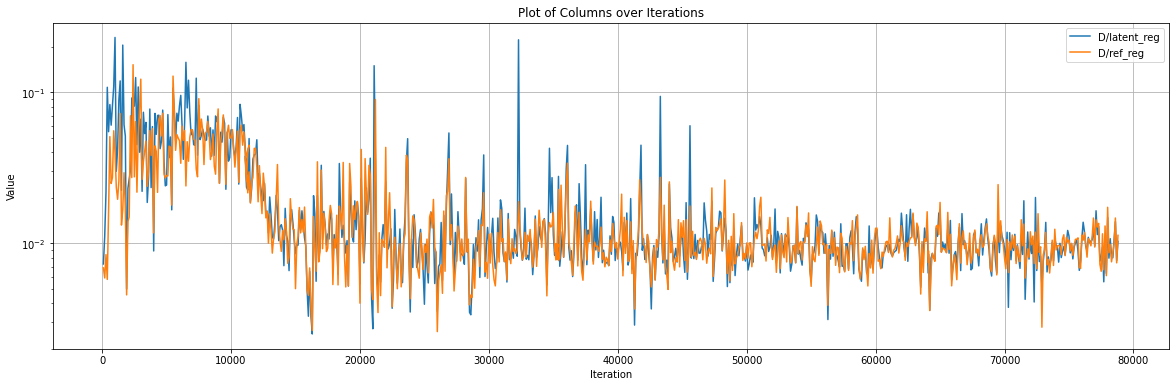

In [5]:
plot_columns(history, ['D/latent_reg', 'D/ref_reg'], logaxis=True)

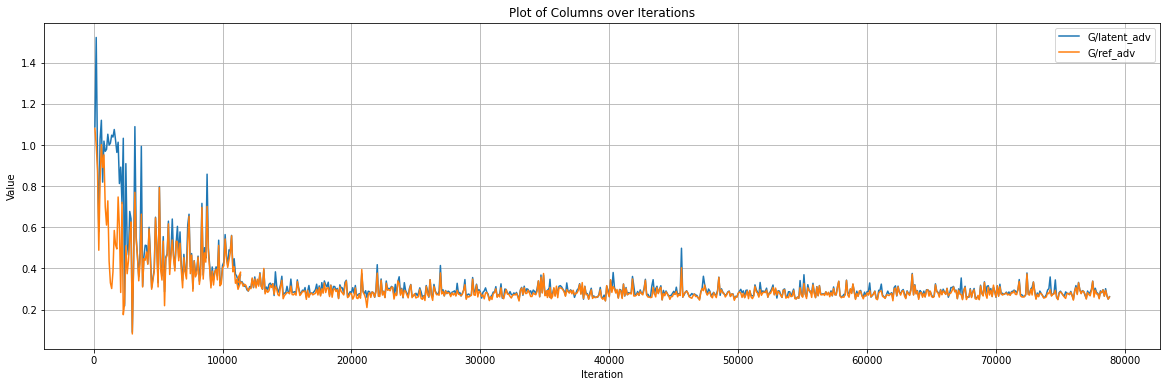

In [19]:
plot_columns(history, ['G/latent_adv', 'G/ref_adv'], logaxis=False)

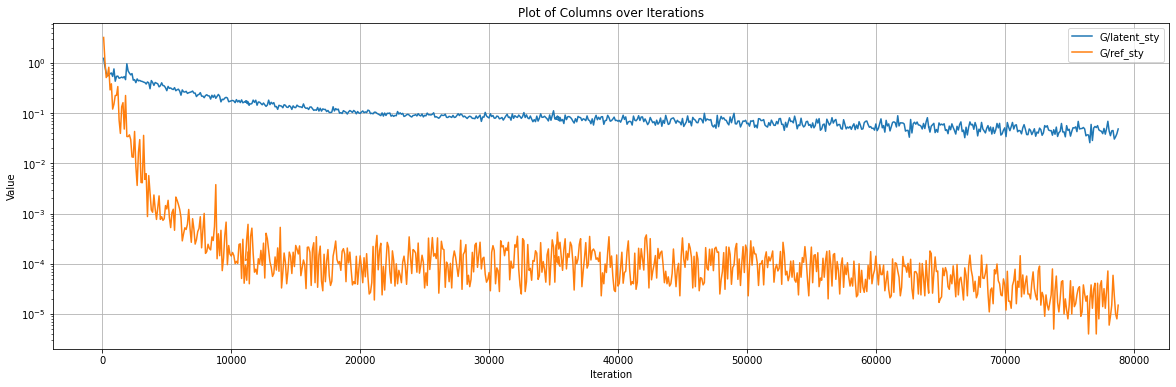

In [7]:
plot_columns(history, ['G/latent_sty', 'G/ref_sty'], logaxis=True)

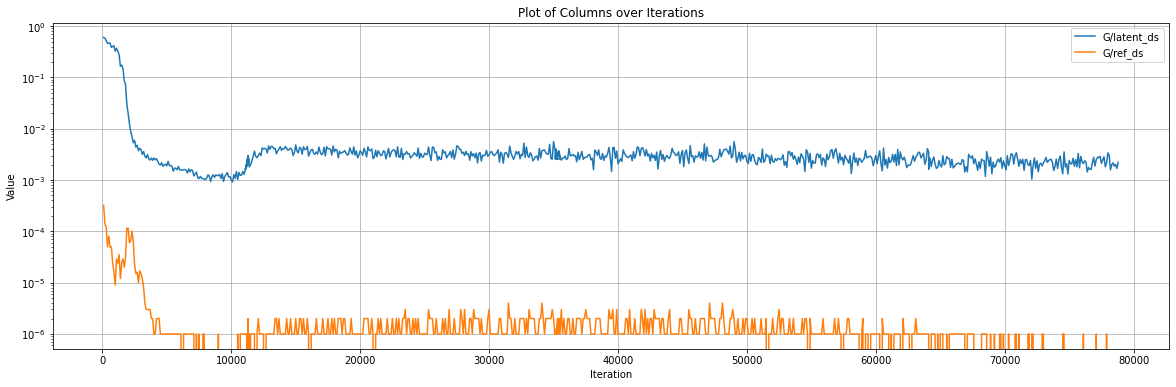

In [8]:
plot_columns(history, ['G/latent_ds', 'G/ref_ds'], logaxis=True)

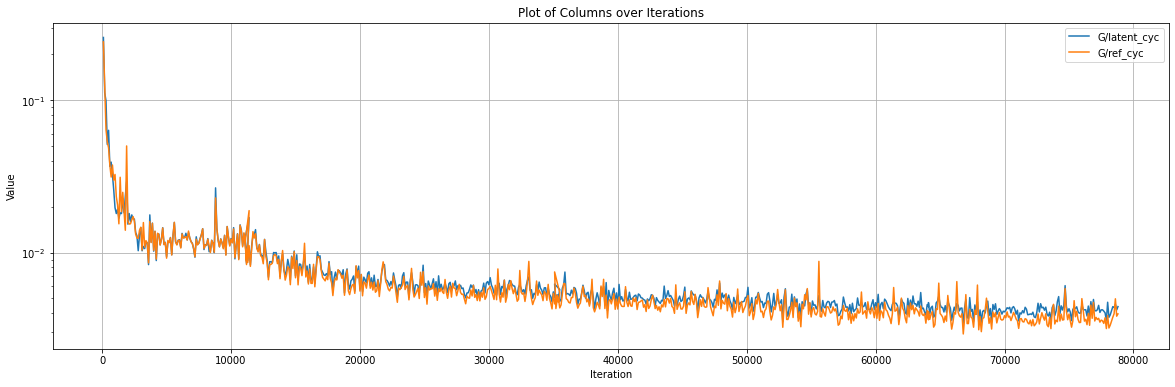

In [9]:
plot_columns(history, ['G/latent_cyc', 'G/ref_cyc'], logaxis=True)

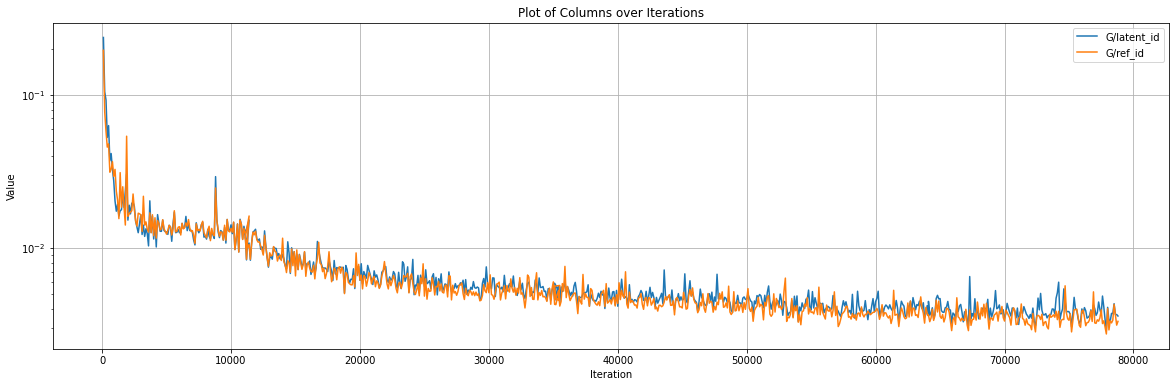

In [10]:
plot_columns(history, ['G/latent_id', 'G/ref_id'], logaxis=True)

In [11]:
# plot_columns(history, ['G/latent_sub', 'G/ref_sub'], logaxis=True)

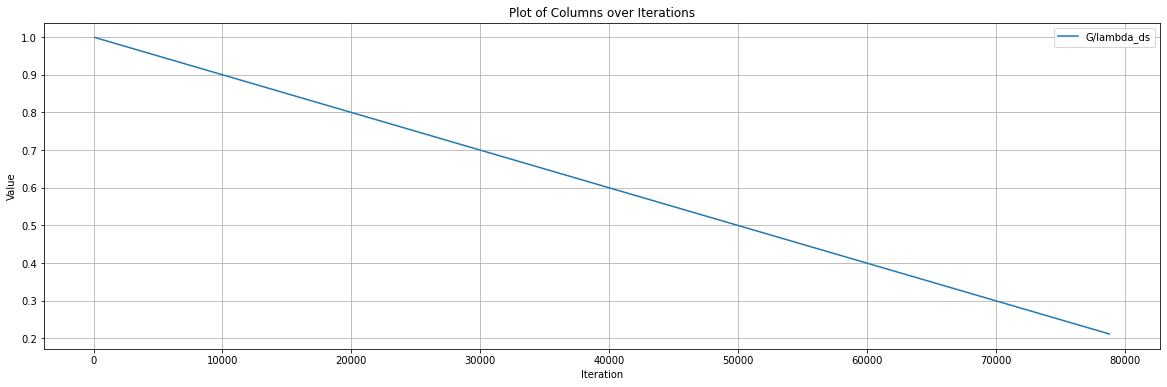

In [12]:
plot_columns(history, ['G/lambda_ds'])

# Metrics

In [13]:
file_path = 'eval/metrics_a.csv'
metrics_a = pd.read_csv(file_path)
metrics_a.head()

,step,mode,metric,source,subject,value
0,1000,latent,accuracy,IR,0,0.249475
1,1000,latent,accuracy,IR,1,0.252493
2,1000,latent,accuracy,IR,2,0.327225
3,1000,latent,accuracy,IR,3,0.280840
4,1000,latent,accuracy,Ball,0,0.253018


Maximum accuracy for Ball in latent mode: 0.4123 at step 45000
Maximum accuracy for IR in latent mode: 0.5079 at step 13000
Maximum accuracy for OR_centred in latent mode: 0.4386 at step 13000
Maximum accuracy for OR_opposite in latent mode: 0.4834 at step 52000
Maximum accuracy for OR_orthogonal in latent mode: 0.4969 at step 13000


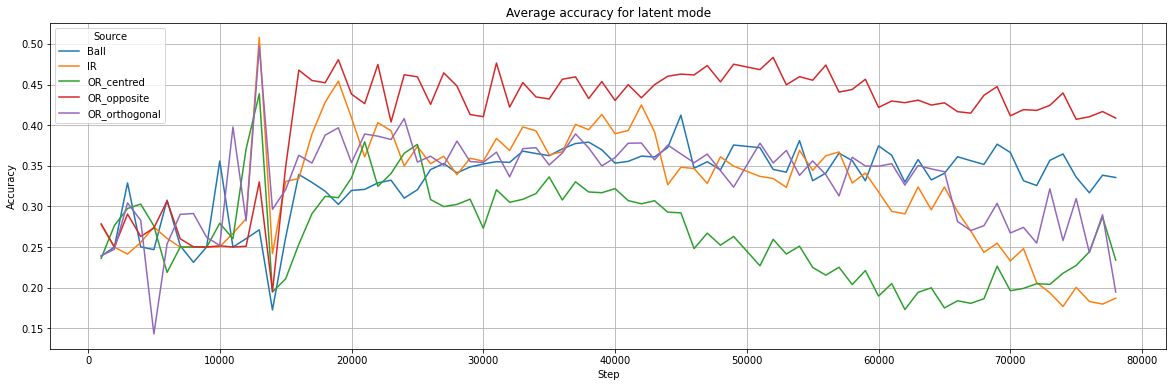

Maximum accuracy for Ball in reference mode: 0.4259 at step 39000
Maximum accuracy for IR in reference mode: 0.4652 at step 11000
Maximum accuracy for OR_centred in reference mode: 0.4632 at step 13000
Maximum accuracy for OR_opposite in reference mode: 0.5423 at step 41000
Maximum accuracy for OR_orthogonal in reference mode: 0.4443 at step 19000


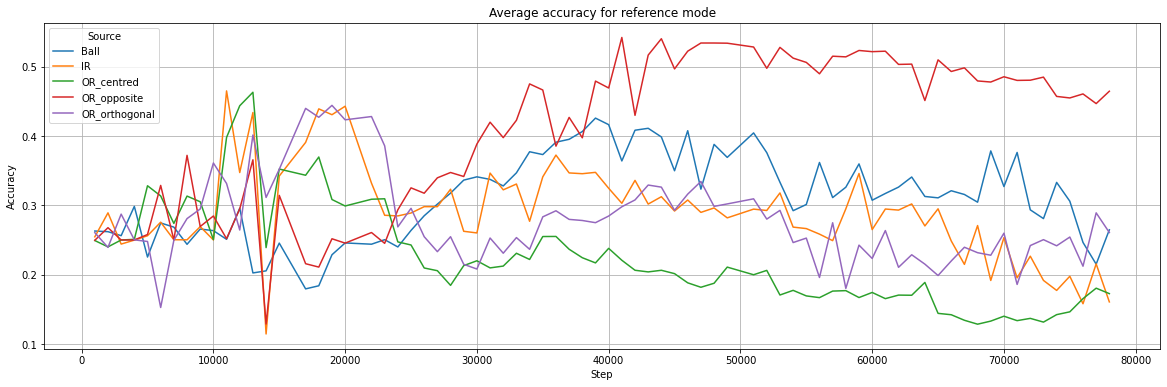

Minimum loss for Ball in latent mode: 1.7374 at step 1000
Minimum loss for IR in latent mode: 1.7955 at step 1000
Minimum loss for OR_centred in latent mode: 1.9205 at step 1000
Minimum loss for OR_opposite in latent mode: 1.7806 at step 1000
Minimum loss for OR_orthogonal in latent mode: 1.7732 at step 1000


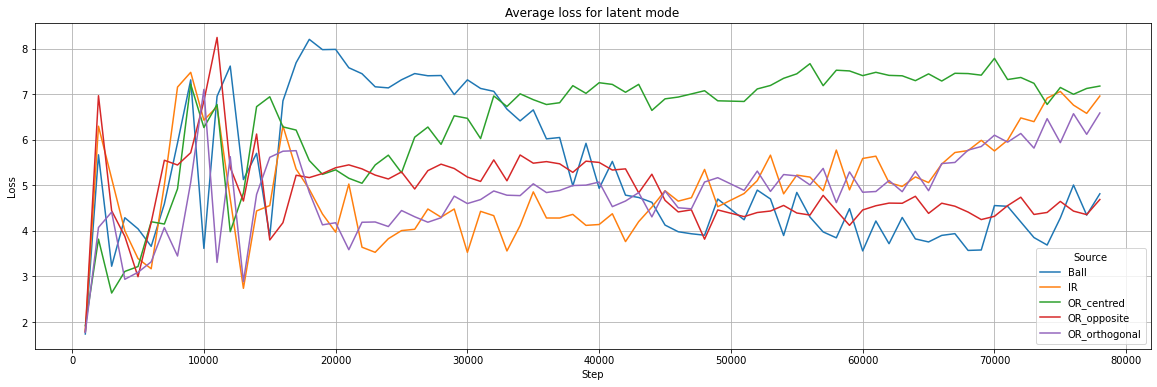

Minimum loss for Ball in reference mode: 2.6671 at step 1000
Minimum loss for IR in reference mode: 1.6929 at step 1000
Minimum loss for OR_centred in reference mode: 2.7417 at step 1000
Minimum loss for OR_opposite in reference mode: 3.0238 at step 75000
Minimum loss for OR_orthogonal in reference mode: 2.4653 at step 1000


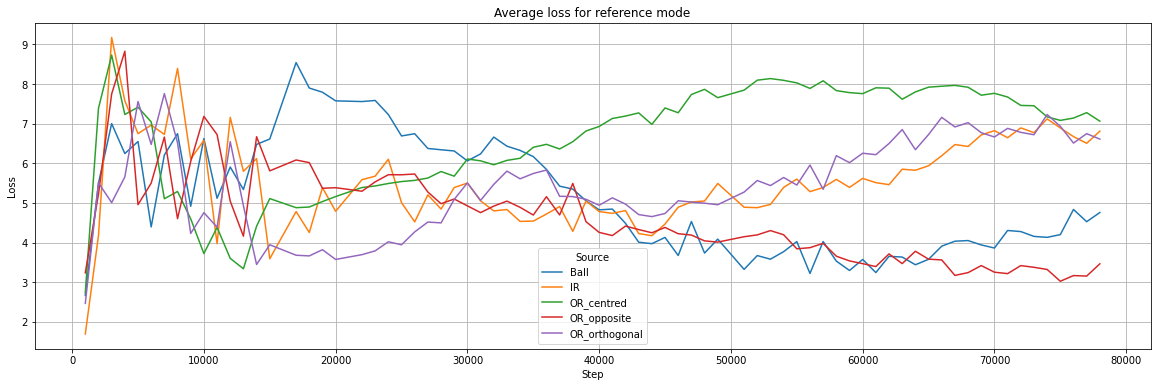

In [14]:
def plot_average_by_mode_metric(metrics, mode, metric):
    
    # Filter the DataFrame based on the mode and metric
    filtered_data = metrics[(metrics['mode'] == mode) & (metrics['metric'] == metric)]

    # Group by 'step' and 'source', then calculate the mean for each group
    mean_data = filtered_data.groupby(['step', 'source']).agg({'value': 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    for source in mean_data['source'].unique():
        source_data = mean_data[mean_data['source'] == source]
        plt.plot(source_data['step'], source_data['value'], label=source)
        if metric == 'accuracy':
            # Find the maximum value of the metric and its corresponding step
            max_value = source_data['value'].max()
            max_step = source_data[source_data['value'] == max_value]['step'].values[0]
            print(f'Maximum {metric} for {source} in {mode} mode: {max_value:.4f} at step {max_step}')
        elif metric == 'loss':
            # Find the minimum value of the metric and its corresponding step
            min_value = source_data['value'].min()
            min_step = source_data[source_data['value'] == min_value]['step'].values[0]
            print(f'Minimum {metric} for {source} in {mode} mode: {min_value:.4f} at step {min_step}')

    plt.title(f'Average {metric} for {mode} mode')
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Source')
    plt.grid(True)
    plt.show()

for metric in metrics_a['metric'].unique():
    for mode in metrics_a['mode'].unique():
        plot_average_by_mode_metric(metrics_a, mode, metric)

Maximum accuracy for Ball: 0.3978 at step 39000
Maximum accuracy for IR: 0.4709 at step 13000
Maximum accuracy for OR_centred: 0.4509 at step 13000
Maximum accuracy for OR_opposite: 0.5045 at step 49000
Maximum accuracy for OR_orthogonal: 0.4492 at step 13000


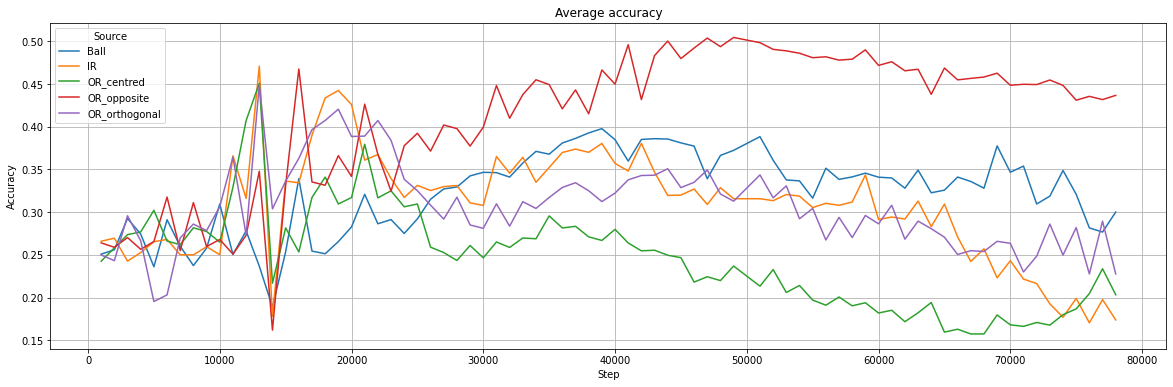

Minimum loss for Ball: 2.2022 at step 1000
Minimum loss for IR: 1.7442 at step 1000
Minimum loss for OR_centred: 2.3311 at step 1000
Minimum loss for OR_opposite: 2.5087 at step 1000
Minimum loss for OR_orthogonal: 2.1193 at step 1000


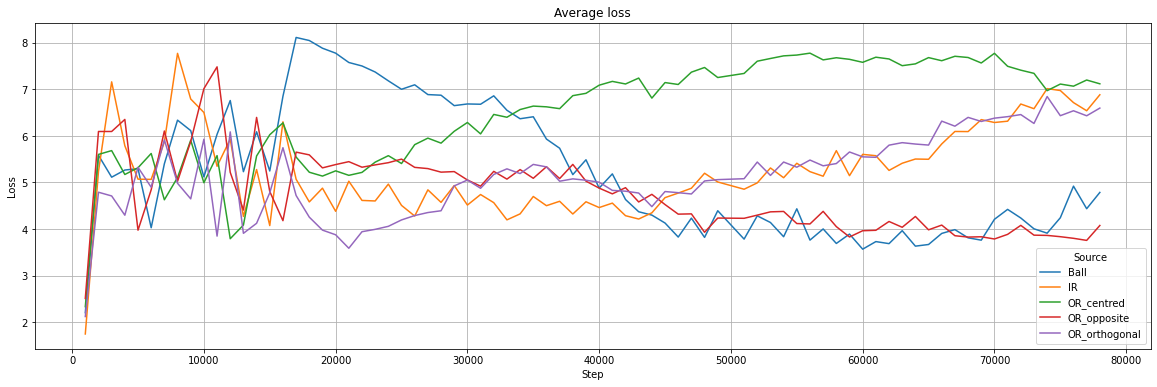

In [15]:
def plot_average_by_activity(metrics, metric):
    
    # Filter the DataFrame based on the mode and metric
    filtered_data = metrics[metrics['metric'] == metric]

    # Group by 'step' and 'source', then calculate the mean for each group
    mean_data = filtered_data.groupby(['step', 'source']).agg({'value': 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    for source in mean_data['source'].unique():
        source_data = mean_data[mean_data['source'] == source]
        plt.plot(source_data['step'], source_data['value'], label=source)
        if metric == 'accuracy':
            # Find the maximum value of the metric and its corresponding step
            max_value = source_data['value'].max()
            max_step = source_data[source_data['value'] == max_value]['step'].values[0]
            print(f'Maximum {metric} for {source}: {max_value:.4f} at step {max_step}')
        elif metric == 'loss':
            # Find the minimum value of the metric and its corresponding step
            min_value = source_data['value'].min()
            min_step = source_data[source_data['value'] == min_value]['step'].values[0]
            print(f'Minimum {metric} for {source}: {min_value:.4f} at step {min_step}')
            # source_data.to_csv(f'{source}_{metric}.csv', index=False)

    plt.title(f'Average {metric}')
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Source')
    plt.grid(True)
    plt.show()

for metric in metrics_a['metric'].unique():
    plot_average_by_activity(metrics_a, metric)

Max in latent mode: 0.4090 at step 13000
Max in reference mode: 0.3734 at step 13000


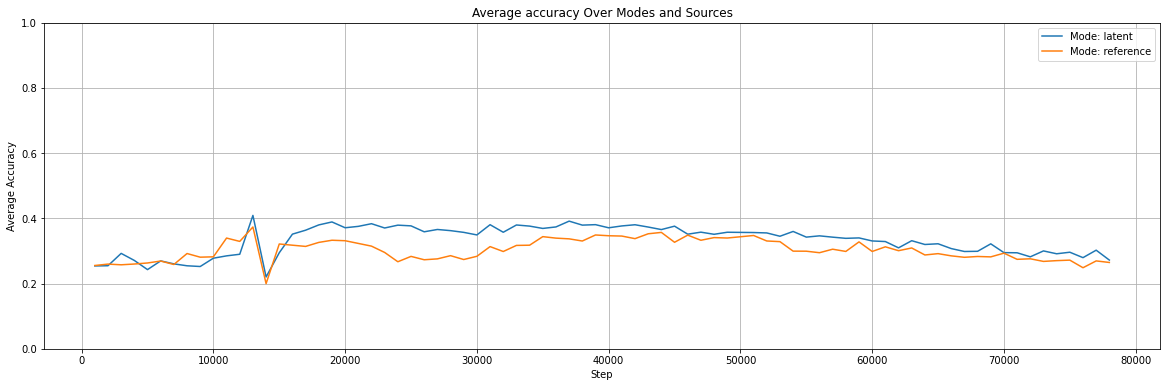

Min in latent mode: 1.8015 at step 1000
Min in reference mode: 2.5607 at step 1000


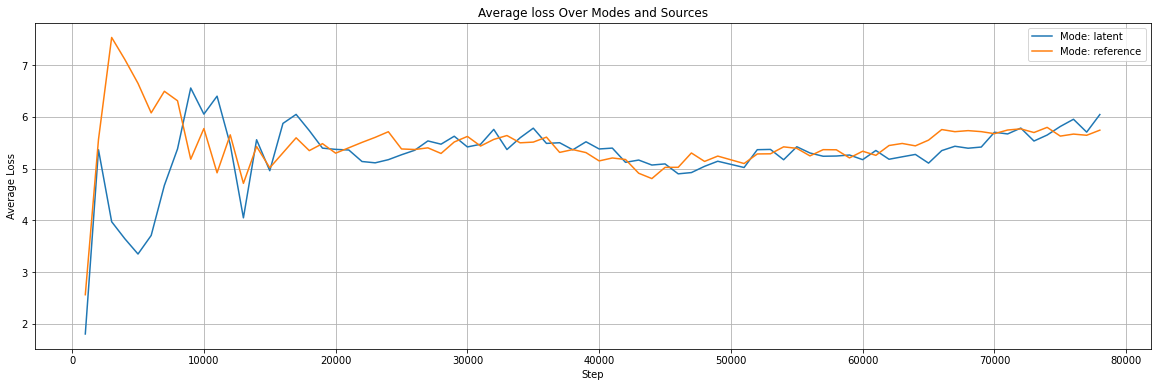

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_metric_over_modes_sources(metrics, metric, ylim=None):
    """
    Plots two lines, each representing the average of values for each mode, averaged over all sources.
    
    Parameters:
        metrics (pd.DataFrame): DataFrame containing the metrics.
        metric (str): The metric to filter by (e.g., 'accuracy' or 'logloss').
    """
    # Filter the DataFrame based on the metric
    filtered_data = metrics[metrics['metric'] == metric]

    # Group by 'step', 'mode' and then calculate the mean across 'source' and 'subject'
    mean_data = filtered_data.groupby(['step', 'mode']).agg({'value': 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    modes = mean_data['mode'].unique()
    for mode in modes:
        mode_data = mean_data[mean_data['mode'] == mode]
        # mode_data.to_csv(f'{mode}_{metric}.csv', index=False)
        plt.plot(mode_data['step'], mode_data['value'], label=f'Mode: {mode}')
        max_value = mode_data['value'].max()
        min_value = mode_data['value'].min()
        if metric == 'accuracy':
            step = mode_data[mode_data['value'] == max_value]['step'].values[0]
            print(f'Max in {mode} mode: {max_value:.4f} at step {step}')
        else:
            step = mode_data[mode_data['value'] == min_value]['step'].values[0]
            print(f'Min in {mode} mode: {min_value:.4f} at step {step}')
    
    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    plt.title(f'Average {metric} Over Modes and Sources')
    plt.xlabel('Step')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_average_metric_over_modes_sources(metrics_a, 'accuracy', ylim=(0, 1))
plot_average_metric_over_modes_sources(metrics_a, 'loss')

In [17]:
identification = pd.read_csv('eval/identification_scores.csv')
identification.head()

,step,mode,source,target,accuracy,loss
0,1000,latent,IR,Ball,0.257098,5.756308
1,1000,latent,IR,OR_centred,0.268665,5.657088
2,1000,latent,IR,OR_orthogonal,0.252892,5.792666
3,1000,latent,IR,OR_opposite,0.256572,5.669636
4,1000,latent,Ball,IR,0.252493,5.689718


Maximum accuracy in latent mode: 0.4954 at step 78000


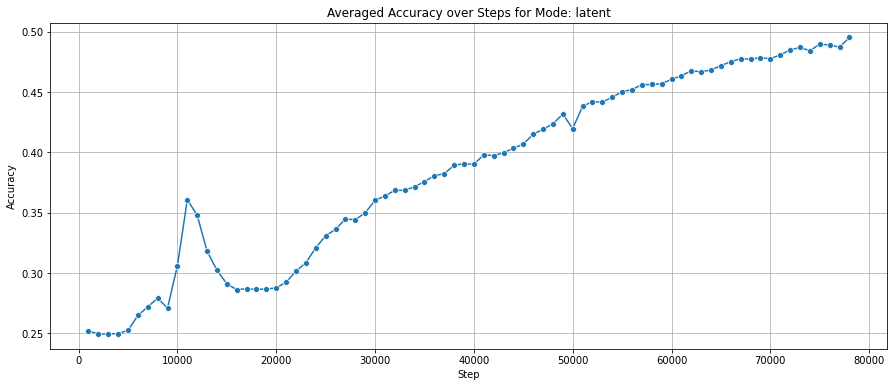

Maximum accuracy in reference mode: 0.5045 at step 78000


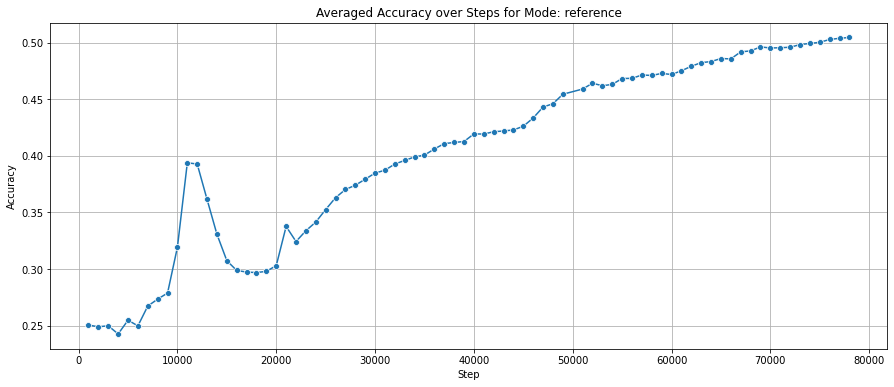

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_metric_averaged(data, mode, metric):
    # Filter the DataFrame based on mode
    filtered_data = data[data['mode'] == mode]
    
    # Group by step and calculate the mean of the metric
    averaged_data = filtered_data.groupby('step', as_index=False)[metric].mean()

    # Print the maximum value of the metric and its corresponding step
    max_value = averaged_data[metric].max()
    max_step = averaged_data[averaged_data[metric] == max_value]['step'].values[0]
    print(f'Maximum {metric} in {mode} mode: {max_value:.4f} at step {max_step}')
    
    # Plotting the line plot
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=averaged_data, x='step', y=metric, marker='o')
    plt.title(f"Averaged {metric.capitalize()} over Steps for Mode: {mode}")
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.show()



for mode in identification['mode'].unique():
    plot_metric_averaged(identification, mode, 'accuracy')